In [43]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [44]:
# df = pd.read_csv('Live.csv')
df = pd.read_csv('knn.csv')
# features = df.drop(['status_id','status_published','status_type'], axis=1)
features = df.drop(['SKU','Cluster'], axis=1)

In [45]:
features.head()

,Average Sales,Standard Deviation
0,4140.112339,878.218495
1,3795.635576,798.917413
2,3865.406117,916.153251
3,3313.539952,744.217089
4,2237.599164,955.988527


In [46]:
cols = features.columns

ms = MinMaxScaler()
features = ms.fit_transform(features)

features = pd.DataFrame(features, columns=[cols])

In [47]:
features

,Average Sales,Standard Deviation
0,0.716285,0.756923
1,0.600904,0.597124
2,0.624273,0.833365
3,0.439427,0.486897
4,0.079044,0.913637
...,...,...
296,0.463409,0.581516
297,0.307270,0.990947
298,0.600624,0.944884
299,0.898820,0.445202


In [48]:
target = df['Cluster']

In [49]:
len(target.unique())

3

### If Species have text labels, we can replace them with numbers using the following command

target['Species'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[1,2,3],inplace=True)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [51]:
for i in range(1,30):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accSc = accuracy_score(y_true=y_test, y_pred=pred)
    print('For ',i,' : Accuracy : ',accSc)

For  1  : Accuracy :  0.22950819672131148
For  2  : Accuracy :  0.29508196721311475
For  3  : Accuracy :  0.29508196721311475
For  4  : Accuracy :  0.2786885245901639
For  5  : Accuracy :  0.29508196721311475
For  6  : Accuracy :  0.2786885245901639
For  7  : Accuracy :  0.2459016393442623
For  8  : Accuracy :  0.2786885245901639
For  9  : Accuracy :  0.3114754098360656
For  10  : Accuracy :  0.32786885245901637
For  11  : Accuracy :  0.29508196721311475
For  12  : Accuracy :  0.2459016393442623
For  13  : Accuracy :  0.3442622950819672
For  14  : Accuracy :  0.26229508196721313
For  15  : Accuracy :  0.36065573770491804
For  16  : Accuracy :  0.36065573770491804
For  17  : Accuracy :  0.3770491803278688
For  18  : Accuracy :  0.3770491803278688
For  19  : Accuracy :  0.36065573770491804
For  20  : Accuracy :  0.3442622950819672
For  21  : Accuracy :  0.29508196721311475
For  22  : Accuracy :  0.36065573770491804
For  23  : Accuracy :  0.3442622950819672
For  24  : Accuracy :  0.344262

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [22]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 1. Normalize the new data using the same scaler
new_data_normalized = ms.transform(new_data)

# 2. Use the trained model to predict on the normalized new data
predictions = model.predict(new_data_normalized)

In [27]:
pred = model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [29]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)

In [32]:
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Setosa','Versicolor','Virginica','helo'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['1','2','3'])

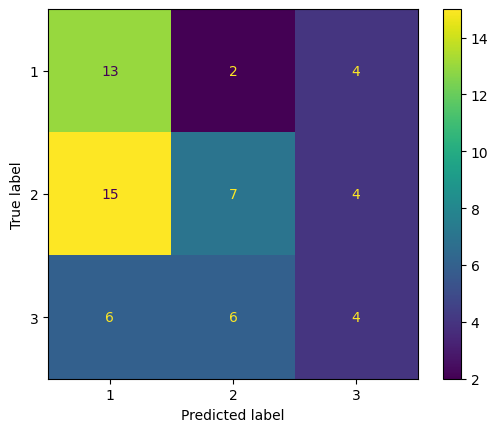

In [33]:
disp.plot()

In [34]:
accSc = accuracy_score(y_true=y_test, y_pred=pred)

In [35]:
accSc

0.39344262295081966